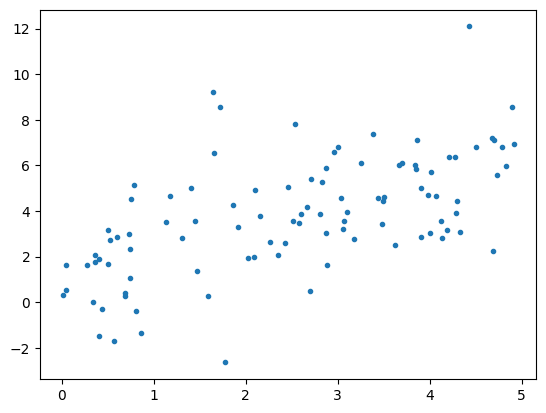

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

N = 100

coeff = 5

# generate sample data
X = coeff * np.random.rand(N)

# oracle (single linear)
y = 1.2 * X + 1 + 2 * np.random.randn(N)

plt.plot(X, y, '.')

In [113]:
X0 = np.ones(N)

X_ = np.stack([X0, X], axis = 1)

X_

array([[1.        , 4.13646242],
       [1.        , 0.33993187],
       [1.        , 2.45989136],
       [1.        , 4.28392875],
       [1.        , 4.32498556],
       [1.        , 3.1734224 ],
       [1.        , 2.3486503 ],
       [1.        , 4.06872114],
       [1.        , 4.12661777],
       [1.        , 0.74327325],
       [1.        , 0.43664666],
       [1.        , 0.729183  ],
       [1.        , 2.26446609],
       [1.        , 4.4290295 ],
       [1.        , 1.72457562],
       [1.        , 0.50343994],
       [1.        , 3.00006629],
       [1.        , 4.18839657],
       [1.        , 3.03943961],
       [1.        , 3.47992144],
       [1.        , 3.62592418],
       [1.        , 2.02871181],
       [1.        , 4.78300658],
       [1.        , 2.67045638],
       [1.        , 3.99845753],
       [1.        , 4.21076326],
       [1.        , 0.40797406],
       [1.        , 0.39921301],
       [1.        , 0.009254  ],
       [1.        , 0.27223086],
       [1.

In [114]:
np.dot(X_.T, X_)

array([[100.        , 252.0271131 ],
       [252.0271131 , 849.32318582]])

In [128]:
np.linalg.inv(np.dot(X_.T, X_))

array([[ 0.03966084, -0.01176891],
       [-0.01176891,  0.0046697 ]])

In [116]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


w = np.dot(np.linalg.inv(np.dot(X_.T, X_)), np.dot(X_.T, y))

print('Method 1: matrix formulation')
print(np.dot(np.linalg.inv(np.dot(X_.T, X_)), np.dot(X_.T, y)))


Method 1: matrix formulation
[1.17817543 1.04045392]


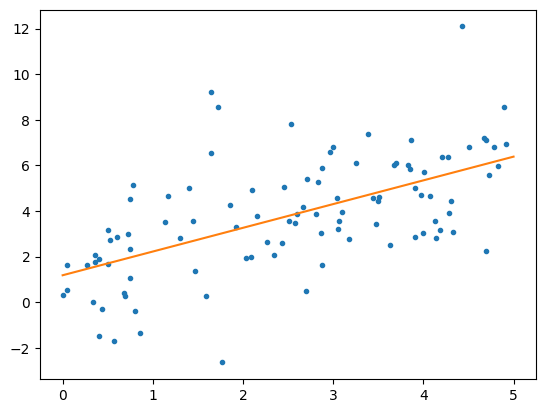

In [117]:
import matplotlib.pyplot as plt

plt.plot(X, y, '.')
plt.plot([0, coeff], [w[0], coeff * w[1] + w[0]])

In [118]:
N = 20

In [119]:
X = np.random.normal(loc=2.5, scale=2.0, size=N)


In [120]:
X.shape

(20,)

In [121]:
X[:, np.newaxis].shape

(20, 1)

In [122]:
norm_noise = np.random.normal(loc=0, scale=0.1, size=N)



In [123]:
norm_noise

array([-0.11157851,  0.14535069,  0.09016147,  0.03912551, -0.15220755,
       -0.35262512,  0.04074363, -0.11217305, -0.10556096, -0.14055656,
       -0.1072927 ,  0.05346204,  0.16566555, -0.18311912, -0.01528516,
        0.05809595, -0.00833287,  0.09306976, -0.03741906,  0.25054343])

In [124]:
norm_noise.reshape(-1, 1)

array([[-0.11157851],
       [ 0.14535069],
       [ 0.09016147],
       [ 0.03912551],
       [-0.15220755],
       [-0.35262512],
       [ 0.04074363],
       [-0.11217305],
       [-0.10556096],
       [-0.14055656],
       [-0.1072927 ],
       [ 0.05346204],
       [ 0.16566555],
       [-0.18311912],
       [-0.01528516],
       [ 0.05809595],
       [-0.00833287],
       [ 0.09306976],
       [-0.03741906],
       [ 0.25054343]])

Method 1: matrix formulation
[[ 0.40246988]
 [-0.13890576]]


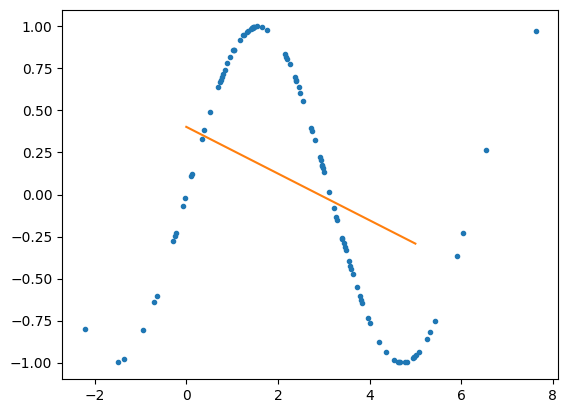

In [130]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(101)

#x[:, None]               # shape: (3, 1) <- 2d (single column matrix)
#x[:, np.newaxis]         # shape: (3, 1) <- a meaningful alias to None
#x.reshape(-1, 1)         # shape: (3, 1)

N = 100


# generate sample data (single linear)
#X = 5 * np.random.rand(N, 1)

X = np.random.normal(loc=2.5, scale=2.0, size=N)
X = X[:, np.newaxis]
#y = 2.2 * X + 1 + 0.8 * np.random.randn(N, 1)
#y = 2 * X**2 + -15.2 * X + 1 + 0.8 * np.random.randn(N, 1)

norm_noise = np.random.normal(loc=0, scale=0.1, size=N)
norm_noise = norm_noise.reshape(-1, 1)

y = np.sin(X) + norm_noise

n, m = X.shape # for generality

X0 = np.ones((n, 1))
Xnew = np.hstack((X0, X))

#X_ = sm.add_constant(X)  # add constant for intercept computation

w = np.dot(np.linalg.inv(np.dot(Xnew.T, Xnew)), np.dot(Xnew.T, y))

print('Method 1: matrix formulation')
print(w)

plt.plot(X, y, '.')
plt.plot([0, 5], [w[0], 5 * w[1] + w[0]])



In [126]:
E_in = (X * w[1] + w[0] - y)**2

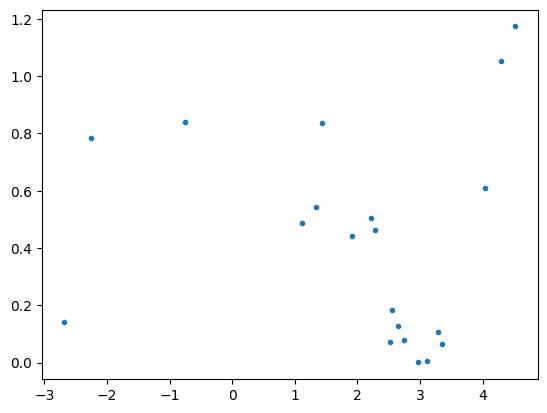

In [127]:
plt.plot(X, E_in, '.')